<a href="https://colab.research.google.com/github/riponalmamun/A-Dataset-of-sandfly/blob/main/Practice_3_For_Main_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models

In [ ]:
# 1. Unzipping the Dataset (if you haven't already)
zip_file_path = '/content/drive/MyDrive/A Dataset of sandfly.zip'
unzip_dir = '/content/A Dataset of sandfly'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [ ]:
# Define the path to the extracted dataset
dataset_path = os.path.join(unzip_dir, 'A Dataset of sandfly')

In [ ]:
# 2. Load and Preprocess the Data
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(150, 150),  # Resize images to 150x150 for consistent input size
    batch_size=32,
    label_mode='int',  # Class labels as integers
    shuffle=True
)

# Store class_names before applying transformations
class_names = train_dataset.class_names # Store class_names here

# Calculate the total number of elements in the dataset
total_samples = tf.data.experimental.cardinality(train_dataset).numpy()

# Calculate the number of elements for validation and training
val_size = int(0.2 * total_samples)
train_size = total_samples - val_size

# Split the dataset into training and validation sets
validation_dataset = train_dataset.take(val_size)  # Take the first val_size elements for validation
train_dataset = train_dataset.skip(val_size)  # Skip the first val_size elements for training

# Display the class names, one per line
print("Class Names:")
for class_name in class_names:
    print(class_name)



Found 1516 files belonging to 12 classes.
Class Names:
Genitalia-Alexandri-Female
Genitalia-Alexandri-Male
Genitalia-Papatasi-Female
Genitalia-Papatasi-Male
Genitalia-Sergenti-Female
Genitalia-Sergenti-Male
Pharynx-Alexandri-Female
Pharynx-Alexandri-Male
Pharynx-Papatasi-Female
Pharynx-Papatasi-Male
Pharynx-Sergenti-Female
Pharynx-Sergenti-Male


# CNN Model

In [ ]:
# 3. Define the CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer with one unit for each class
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 4. Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30
)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.2465 - loss: 2.3296 - val_accuracy: 0.3229 - val_loss: 1.8572
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3476 - loss: 1.7430 - val_accuracy: 0.3611 - val_loss: 1.8854
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4237 - loss: 1.6193 - val_accuracy: 0.4410 - val_loss: 1.5086
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4945 - loss: 1.3833 - val_accuracy: 0.5069 - val_loss: 1.3471
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5549 - loss: 1.2769 - val_accuracy: 0.5729 - val_loss: 1.1256
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5756 - loss: 1.1689 - val_accuracy: 0.5521 - val_loss: 1.0921
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5557 - loss: 1.1618 - val_accuracy: 0.5764 - val_loss: 1.2012
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6486 - loss: 1.0133 - val_accuracy: 0.6528 - 

# Plotting

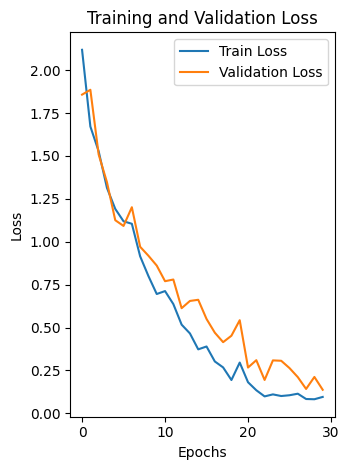

In [ ]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# 6. Evaluate the Model on Validation Data
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test Accuracy: {test_acc}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9439 - loss: 0.1555
Test Accuracy: 0.9513888955116272


In [ ]:
# 7. Save the Model
model.save('sandfly_classification_model.h5')

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [ ]:
# Load dataset with updated image size (224x224)
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),  # Updated image size to 224x224
    batch_size=32,
    label_mode='int',  # Class labels as integers
    shuffle=True
)

Found 1516 files belonging to 12 classes.


In [ ]:
# Split dataset into training and validation sets
total_samples = tf.data.experimental.cardinality(train_dataset).numpy()  # Get total number of samples
val_size = int(0.2 * total_samples)  # Calculate number of samples for validation
train_size = total_samples - val_size  # Calculate number of samples for training

validation_dataset = train_dataset.take(val_size)  # Take val_size elements for validation
train_dataset = train_dataset.skip(val_size)  # Skip val_size elements for training

In [ ]:
# Load dataset with updated image size (224x224)
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(224, 224),  # Updated image size to 224x224
    batch_size=32,
    label_mode='int',  # Class labels as integers
    shuffle=True
)

# Store class_names before applying transformations
class_names = train_dataset.class_names  # Store class_names immediately after dataset creation

# Split dataset into training and validation sets
total_samples = tf.data.experimental.cardinality(train_dataset).numpy()  # Get total number of samples
val_size = int(0.2 * total_samples)  # Calculate number of samples for validation
train_size = total_samples - val_size  # Calculate number of samples for training

validation_dataset = train_dataset.take(val_size)  # Take val_size elements for validation
train_dataset = train_dataset.skip(val_size)  # Skip val_size elements for training

# Display the class names, one per line
print("Class Names:")
for class_name in class_names:
    print(class_name)


Found 1516 files belonging to 12 classes.
Class Names:
Genitalia-Alexandri-Female
Genitalia-Alexandri-Male
Genitalia-Papatasi-Female
Genitalia-Papatasi-Male
Genitalia-Sergenti-Female
Genitalia-Sergenti-Male
Pharynx-Alexandri-Female
Pharynx-Alexandri-Male
Pharynx-Papatasi-Female
Pharynx-Papatasi-Male
Pharynx-Sergenti-Female
Pharynx-Sergenti-Male


# ResNet50

In [ ]:
# ResNet50

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# ... (Your existing code for data loading and preprocessing) ...

# 3. Define the ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30  # You might need to adjust the number of epochs
)



Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.5016 - loss: 1.8038 - val_accuracy: 0.7118 - val_loss: 0.7903
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.7500 - loss: 0.6446 - val_accuracy: 0.7778 - val_loss: 0.5703
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.8609 - loss: 0.4047 - val_accuracy: 0.8611 - val_loss: 0.4066
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8941 - loss: 0.3058 - val_accuracy: 0.8854 - val_loss: 0.3481
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8975 - loss: 0.2847 - val_accuracy: 0.8611 - val_loss: 0.4036
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9052 - loss: 0.2634 - val_accuracy: 0.9132 - val_loss: 0.2708
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9390 - loss: 0.1653 - val_accuracy: 0.9236 - val_loss: 0.2443
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9534 - loss: 0.1478 - val_accuracy: 0

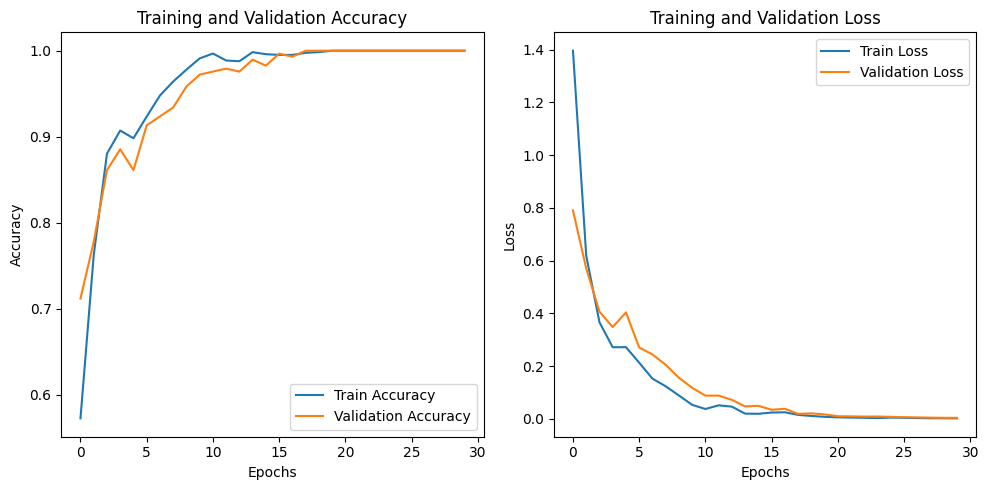

In [ ]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss (already present in your code)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# vgg16

In [ ]:
# vgg16

from tensorflow.keras.applications import VGG16

# ... (Your existing code for data loading and preprocessing) ...

# 3. Define the VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30  # You might need to adjust the number of epochs
)



Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.4181 - loss: 3.3582 - val_accuracy: 0.7083 - val_loss: 0.7597
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.7581 - loss: 0.6672 - val_accuracy: 0.7917 - val_loss: 0.5414
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.8420 - loss: 0.4625 - val_accuracy: 0.8854 - val_loss: 0.2866
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.9228 - loss: 0.2219 - val_accuracy: 0.9028 - val_loss: 0.3088
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9434 - loss: 0.2013 - val_accuracy: 0.8958 - val_loss: 0.2378
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9591 - loss: 0.1202 - val_accuracy: 0.9236 - val_loss: 0.1950
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9483 - loss: 0.1418 - val_accuracy: 0.8993 - val_loss: 0.3444
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9540 - loss: 0.1665 - val_accuracy: 

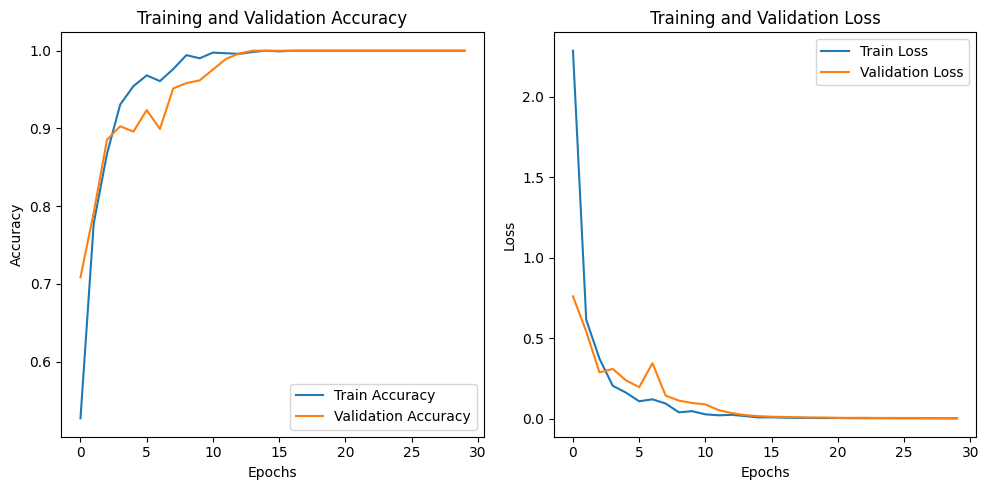

In [ ]:
# vgg16 plot

import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# InceptionV3

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.1414 - loss: 79.7215 - val_accuracy: 0.3194 - val_loss: 13.0584
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.3367 - loss: 9.4779 - val_accuracy: 0.3472 - val_loss: 3.6394
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.3865 - loss: 3.4928 - val_accuracy: 0.4375 - val_loss: 3.1818
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.4504 - loss: 2.7011 - val_accuracy: 0.4722 - val_loss: 2.7683
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4649 - loss: 2.6300 - val_accuracy: 0.3403 - val_loss: 2.8845
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4438 - loss: 2.4928 - val_accuracy: 0.4549 - val_loss: 2.1767
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.4909 - loss: 1.8213 - val_accuracy: 0.4479 - val_loss: 2.9298
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.4692 - loss: 2.1669 - val_accuracy: 0.538

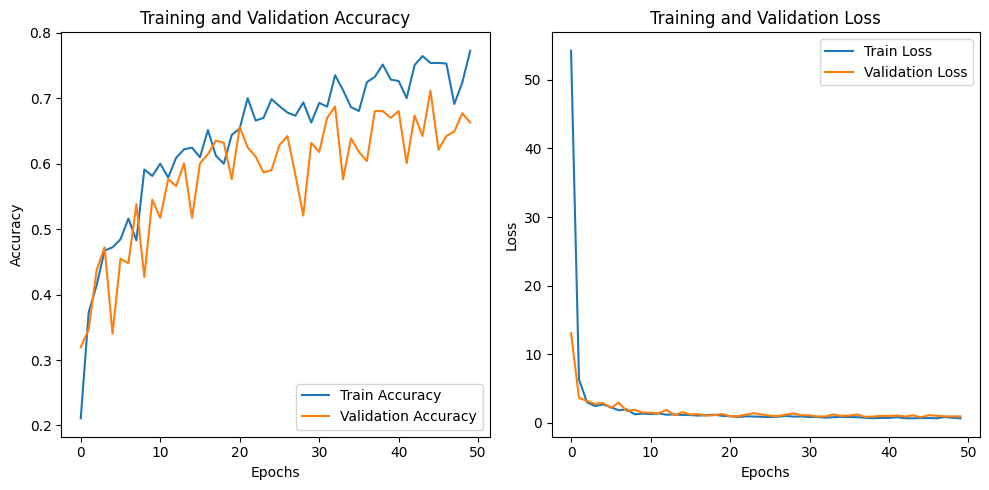

In [ ]:
# InceptionV3

from tensorflow.keras.applications import InceptionV3

# ... (Your existing code for data loading and preprocessing) ...

# 3. Define the InceptionV3 Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50  # You might need to adjust the number of epochs
)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# MobileNet

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.4407 - loss: 1.9073 - val_accuracy: 0.6528 - val_loss: 0.9153
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6651 - loss: 0.8894 - val_accuracy: 0.6910 - val_loss: 0.7964
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7265 - loss: 0.7341 - val_accuracy: 0.7188 - val_loss: 0.6730
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7775 - loss: 0.6297 - val_accuracy: 0.7222 - val_loss: 0.7474
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7902 - loss: 0.5954 - val_accuracy: 0.7222 - val_loss: 0.7223
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7945 - loss: 0.5456 - val_accuracy: 0.7604 - val_loss: 0.6971
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8087 - loss: 0.5688 - val_accuracy: 0.7604 - val_loss: 0.6230
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8448 - loss: 0.4497 - val_accuracy: 0.7708 - 

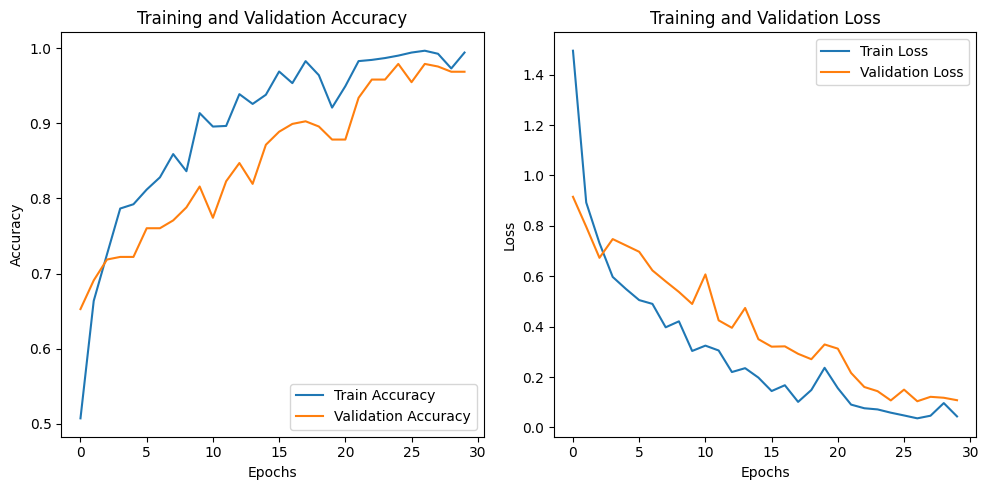

In [ ]:
# MobileNet

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# ... (Your existing code for data loading and preprocessing) ...

# 3. Define the MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30  # You might need to adjust the number of epochs
)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# 8. Evaluate the Model on Validation Data
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test Accuracy: {test_acc}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9600 - loss: 0.1226
Test Accuracy: 0.9652777910232544


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a sample model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')  # Example output layer with 12 classes
])

# 1. Display the model summary
print("Model Summary:")
model.summary()

# 2. Extract the total parameters by layer
print("\nParameters by Layer:")
for layer in model.layers:
    print(f"Layer: {layer.name}, Parameters: {layer.count_params()}")

# 3. Optional: Compute FLOPs using keras-flops library
try:
    from keras_flops import get_flops

    # Calculate FLOPs
    flops = get_flops(model, batch_size=1)
    print(f"\nFLOPs: {flops / 1e9} GFLOPs")
except ImportError:
    print("\nTo compute FLOPs, install keras-flops: pip install keras-flops")


Model Summary:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_401 (Conv2D)                  │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_402 (Conv2D)                  │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,328,652 (20.33 MB)

 Trainable params: 5,328,652 (20.33 MB)

 Non-trainable params: 0 (0.00 B)


Parameters by Layer:
Layer: conv2d_401, Parameters: 896
Layer: max_pooling2d_40, Parameters: 0
Layer: conv2d_402, Parameters: 18496
Layer: max_pooling2d_41, Parameters: 0
Layer: flatten_10, Parameters: 0
Layer: dense_40, Parameters: 5308480
Layer: dense_41, Parameters: 780

To compute FLOPs, install keras-flops: pip install keras-flops


In [ ]:
from tensorflow.keras import layers, models

# Existing model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Remove the Flatten layer to keep the data in 4D for the new Conv2D layer
    # layers.Flatten(),
    layers.Conv2D(128, (3, 3), activation='relu'),  # New filter layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Now flatten for the Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])

# Recompile model if necessary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display updated model summary
print("Updated Model Summary:")
model.summary()

Updated Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_425 (Conv2D)                  │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_426 (Conv2D)                  │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_427 (Conv2D)                  │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,461,580 (9.39 MB)

 Trainable params: 2,461,580 (9.39 MB)

 Non-trainable params: 0 (0.00 B)